In [47]:
#import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [48]:
#load data
df = pd.read_csv("HorrorSVMCookies.csv")
df = df[['Rating', 'Raters']]
df

,Rating,Raters
0,4.26,1331732
1,4.25,979436
2,4.01,1119957
3,3.98,630669
4,4.04,516341
...,...,...
1243,3.40,59940
1244,3.47,2136
1245,3.64,7614
1246,3.45,3671


In [49]:
#feature scaling to standardize the data (this is the reason later on there are some negative values to Rating and Raters)
sc_df = StandardScaler()
df_std= sc_df.fit_transform(df.astype(float))
df_std

array([[ 1.40701055,  4.44866496],
       [ 1.37045417,  3.20049934],
       [ 0.49310105,  3.69835762],
       ...,
       [-0.85948503, -0.24261327],
       [-1.55405625, -0.25658311],
       [ 0.82210847, -0.03213041]])

In [50]:
#k-means clustering
kmeans = KMeans(n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0).fit(df_std)
labels = kmeans.labels_

y_km = kmeans.fit_predict(df_std)
new_df = pd.DataFrame(data = df_std, columns = ['Rating', 'Raters'])
new_df['label_kmeans'] = labels
new_df

,Rating,Raters,label_kmeans
0,1.407011,4.448665,1
1,1.370454,3.200499,2
2,0.493101,3.698358,1
3,0.383432,1.964837,2
4,0.602770,1.559779,2
...,...,...,...
1243,-1.736838,-0.057225,0
1244,-1.480943,-0.262022,0
1245,-0.859485,-0.242613,0
1246,-1.554056,-0.256583,0


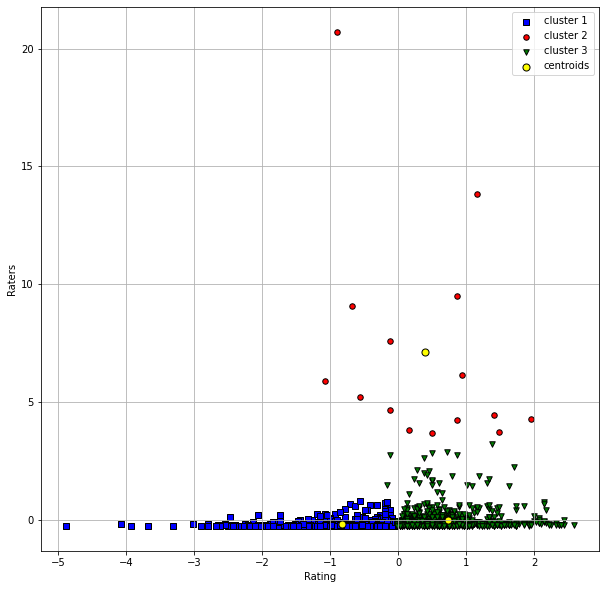

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
#plotting the 3 clusters
plt.scatter(new_df["Rating"][new_df["label_kmeans"] == 0], new_df["Raters"][new_df["label_kmeans"] == 0], color = "blue", s=30, edgecolor='black',marker='s',label='cluster 1')
plt.scatter(new_df["Rating"][new_df["label_kmeans"] == 1], new_df["Raters"][new_df["label_kmeans"] == 1], color = "red", s=30, edgecolor='black',marker='o',label='cluster 2')
plt.scatter(new_df["Rating"][new_df["label_kmeans"] == 2], new_df["Raters"][new_df["label_kmeans"] == 2], color = "green", s=30, edgecolor='black',marker='v',label='cluster 3' )

#plotting the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', edgecolor='black', s=50,label='centroids')
ax.set_xlabel('Rating')
ax.set_ylabel('Raters')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [52]:
#finding the elbow using kneed locator
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

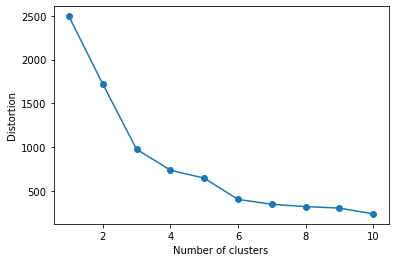

In [53]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()